 # **AIR** **QUALITY** **PREDICTION MODEL**




**Name** : Raziya Firosh


**Organisation** : Entri Elevate


**Date**: 25/04/2025

#  **Overview** **of** **problem** **Statement**

Air pollution is a major global concern, affecting human health, climate, and ecosystems. Monitoring air quality is essential for understanding pollution levels, identifying key pollutants, and taking necessary actions to improve environmental conditions. However, with increasing urbanization and industrialization, air pollution levels continue to rise, posing serious health risks. This study aims to analyze air quality data to identify trends, detect anomalies, and understand the impact of various pollutants on environmental and human health.

# **Objective**

To analyze air quality data, identify pollution trends, assess key pollutants’ impact, and provide insights for environmental improvement.

#  **Data** **Description**

 **Source**: **Data** **World**

##**Features in the dataset:**

The dataset consists of  **12** columns representing different air quality attributes and **18,025** rows, each corresponding to a specific air quality measurement recorded at a given location and time.


•	**Unique** **ID**: A unique identifier for each data entry.

•	**Indicator** **ID**: Represents different air quality indicators.

•	**Name**: The name of the air quality indicator (e.g., “Ozone (O3)”, “Boiler Emissions- Total SO2 Emissions”).

•	**Measure**: Specifies the type of measurement (e.g., “Mean”, “Number per km²”).

•	**Measure** **Info**: Additional information about the measurement, such as units (e.g., “ppb”, “number”).

•	**Geo** **Type** **Name**: The geographic level of the data (e.g., “UHF42”, “UHF34”).

•	**Geo** **Join** **ID**: A numerical ID for joining geographic data.

•	**Geo** **Place** **Name**: The name of the geographic area where data was collected.

•	**Time** **Period**: The time period for which data was recorded (e.g., “Summer
2014”, “2015”).

•	**Start_Date**: The exact start date of data collection.

•	**Data** **Value**: The actual recorded air quality value. This is likely the target variable.

•	**Message**: Contains additional notes, sometimes missing (NaN).

 **Target variable**:  **Data Value**

# **Data** **Collection**

**Dataset link**      :https://catalog.data.gov/dataset/air-quality

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Air_Quality.csv to Air_Quality (3).csv


###**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding
from sklearn.ensemble import RandomForestClassifier  # Example classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation

pandas:	For handling data as DataFrames

numpy:	For numerical operations

matplotlib.pyplot & seaborn:	For data visualization

sklearn.model_selection.train_test_split: To split data into training and test sets

StandardScaler:	For normalizing numerical features

LabelEncoder:	For converting categorical data to numbers

RandomForestClassifier:	A machine learning algorithm used here as an example

accuracy_score, classification_report, confusion_matrix:	For evaluating the model’s performance

In [ ]:
data = pd.read_csv('Air_Quality.csv')
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN


In [ ]:
#displaying first 5 rows
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN


In [ ]:
#displaying last 5 rows
data.tail()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN
18024,151658,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,408.0,Jamaica,2005,01/01/2005,41.0,NaN


#**Data Preprocessing- Data Cleaning**

In [ ]:
#Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


In [ ]:
data.shape

(18025, 12)

In [ ]:
data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,18025.000000,18025.000000,1.801600e+04,18025.000000,0.0
mean,426387.692705,434.830180,5.906303e+05,21.428616,NaN
std,250489.450630,115.852371,7.769549e+06,23.999345,NaN
min,121644.000000,365.000000,1.000000e+00,0.000000,NaN
25%,175303.000000,365.000000,2.020000e+02,8.900000,NaN
50%,410803.000000,375.000000,3.030000e+02,15.200000,NaN
75%,649893.000000,386.000000,4.040000e+02,26.700000,NaN
max,828353.000000,661.000000,1.051061e+08,424.700000,NaN


**Mean>50% - which means positively skewed**

**Mean<50% - which means negatively skewed**

In [ ]:
print(data.describe())

           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830180  5.906303e+05     21.428616      NaN
std    250489.450630    115.852371  7.769549e+06     23.999345      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    175303.000000    365.000000  2.020000e+02      8.900000      NaN
50%    410803.000000    375.000000  3.030000e+02     15.200000      NaN
75%    649893.000000    386.000000  4.040000e+02     26.700000      NaN
max    828353.000000    661.000000  1.051061e+08    424.700000      NaN


###**1**. **Handling** **Missing** **Values**

In [ ]:
 # To check the null values
data.isnull().sum()

,0
Unique ID,0
Indicator ID,0
Name,0
Measure,0
Measure Info,0
Geo Type Name,0
Geo Join ID,9
Geo Place Name,9
Time Period,0
Start_Date,0


I used data.info() ,data.shape(),data.describe() to understand the structure of the dataset.

Yes, There is a missing values in the dataset ;

Column "Geo Join ID" : 9 missing values

Column "Geo Place Name" :9 missing values

Column "Message" :18,025 missing values (completely empty)

Here i removed Unique ID and Message columns because they either provide redundant, non-informative, or missing information. Message contained only null values. Dropping these columns ensures a cleaner and more efficient dataset for analysis and modeling. The missing values in "Geo Join ID" and "Geo Place Name" should be handled, either by filling them with appropriate values or dropping the affected rows.
Here missing values are very few so i remove the missing values.


**Removing Missing Values**

Since the "Message" column has 18,025 missing values, it's almost empty and not useful for analysis.

I removed Unique ID, Message columns because they either provide redundant, non-informative, or missing information. Dropping these columns ensures a cleaner and more efficient dataset for analysis and modeling.



In [ ]:
# Removes columns with missing values
data.drop(columns=["Unique ID","Message"], inplace=True)

In [ ]:
# Removes rows with missing values
data.dropna(subset=["Geo Join ID", "Geo Place Name"], inplace=True)

**Checking** **Duplicates**

In [ ]:
data.duplicated().sum()

np.int64(0)

**Check if missing values are handled correctly:**

In [ ]:
print(data.isnull().sum())
print(data.shape)

Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64
(18016, 10)


In [ ]:
print(data['Start_Date'].head(10))


0    01/01/2015
1    06/01/2014
2    06/01/2014
3    06/01/2014
4    06/01/2014
5    01/01/2015
6    12/01/2011
7    12/01/2011
8    06/01/2022
9    06/01/2014
Name: Start_Date, dtype: object


In [ ]:
# convert Start_Date to Year and month

data = data.assign(
    Start_Date=pd.to_datetime(data['Start_Date'], errors='coerce'),
    Year=lambda x: x['Start_Date'].dt.year,
    Month=lambda x: x['Start_Date'].dt.month
).drop(columns=['Start_Date'])

In [ ]:
print(data[['Year', 'Month']].head())

   Year  Month
0  2015      1
1  2014      6
2  2014      6
3  2014      6
4  2014      6


In [ ]:
data

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Month
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,0.3,2015,1
1,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,24.9,2014,6
2,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,30.7,2014,6
3,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,32.0,2014,6
4,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,31.9,2014,6
...,...,...,...,...,...,...,...,...,...,...,...
18020,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,12.9,2019,1
18021,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,14.7,2010,1
18022,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,43.4,2010,1
18023,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,65.8,2010,1


The original Start_Date captures a specific point or period, but for air quality analysis, it's more useful to study yearly & monthly trends rather than looking at specific dates. Machine learning models work better with simple numerical features like Year and Month, rather than complex date strings. Extracting Year and Month provides meaningful time-related features that the model can easily learn from.

###**2**.**Checking Outliers**

In [ ]:
print(data.columns)

Index(['Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name',
       'Geo Join ID', 'Geo Place Name', 'Time Period', 'Data Value', 'Year',
       'Month'],
      dtype='object')


In [ ]:
data['Name'].value_counts()

,count
Name,
Nitrogen dioxide (NO2),5922
Fine particles (PM 2.5),5922
Ozone (O3),2115
Asthma emergency departments visits due to Ozone,480
Asthma emergency department visits due to PM2.5,480
Asthma hospitalizations due to Ozone,480
Annual vehicle miles traveled (cars),321
Annual vehicle miles traveled,321
Annual vehicle miles traveled (trucks),321


In [ ]:
data.describe()

,Indicator ID,Geo Join ID,Data Value,Year,Month
count,18016.000000,1.801600e+04,18016.000000,18016.00000,18016.000000
mean,434.720748,5.906303e+05,21.412678,2014.23679,6.298457
std,115.777767,7.769549e+06,23.976151,4.50928,4.484916
min,365.000000,1.000000e+00,0.000000,2005.00000,1.000000
25%,365.000000,2.020000e+02,8.900000,2011.00000,1.000000
50%,375.000000,3.030000e+02,15.200000,2015.00000,6.000000
75%,386.000000,4.040000e+02,26.700000,2018.00000,12.000000
max,661.000000,1.051061e+08,424.700000,2022.00000,12.000000


In [ ]:
import numpy as np

# 1. Select numeric columns (excluding target column 'Data Value')
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# 2. Remove 'Data Value' from the list
if 'Data Value' in numeric_cols:
    numeric_cols.remove('Data Value')

# 3. Now check skewness for all remaining numeric columns
skewness = data[numeric_cols].skew()

# 4. Display skewness values
print(skewness)


Indicator ID     1.307189
Geo Join ID     13.377958
Year            -0.108799
Month            0.123293
dtype: float64


**Symmetrical Distribution: Skewness is around 0.**

**Moderately Skewed: Skewness between -0.5 and 0.5.**

**Highly Skewed: Skewness less than -1 or greater than 1.**


In [ ]:
# Convert Year and Month to integers
data['Year'] = data['Year'].astype('int64')
data['Month'] = data['Month'].astype('int64')

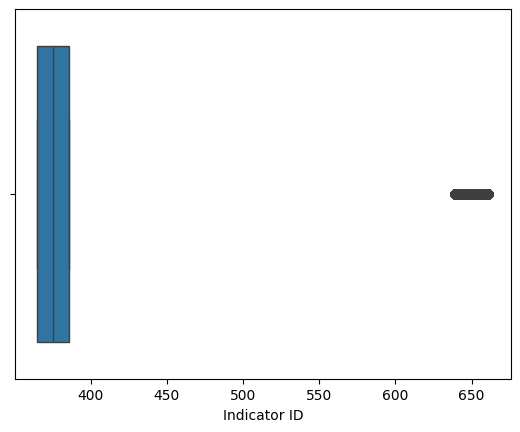

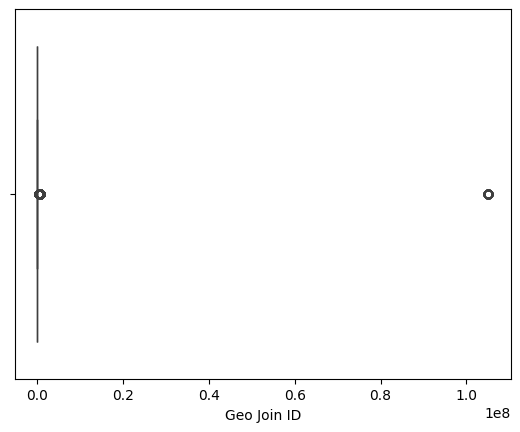

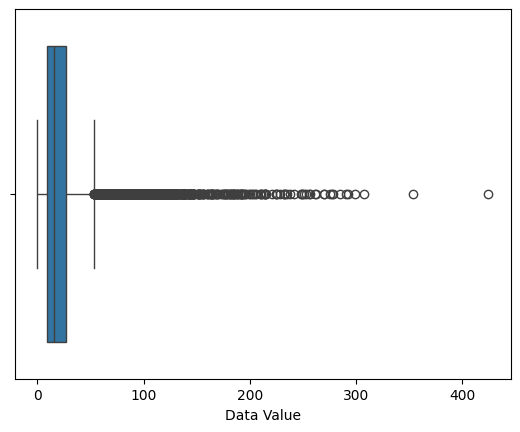

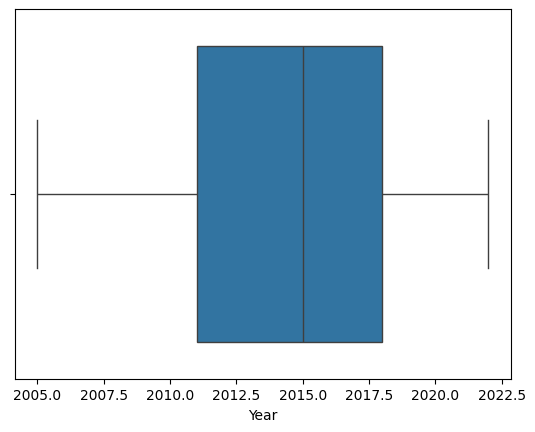

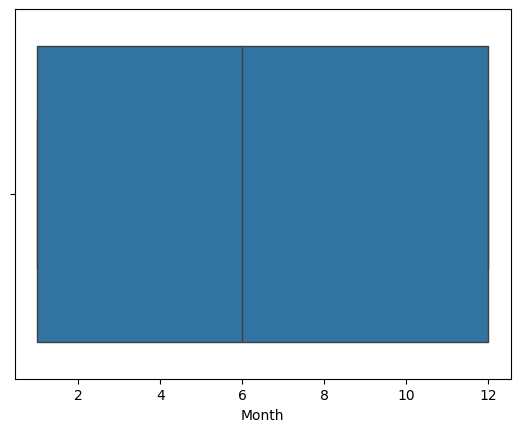

In [ ]:
# Boxplot to identify outliers

for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

Capping is used to handle outliers by limiting extreme values within a specified range. Instead of removing outliers, it replaces values beyond a threshold (like the 5th and 95th percentiles) with the nearest acceptable values

In [ ]:
# Define a function for capping
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return series.clip(lower=lower_limit, upper=upper_limit)

# List all numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column 'Data Value' from list
numeric_cols.remove('Data Value')

# Apply capping for all numeric columns except target
for col in numeric_cols:
    data[col] = cap_outliers(data[col])

print("✅ Capping done successfully on features!")


✅ Capping done successfully on features!


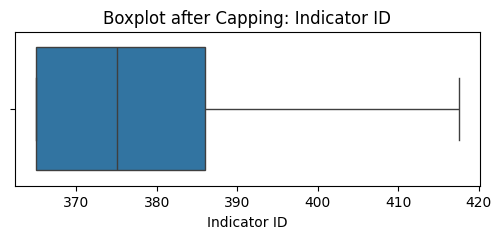

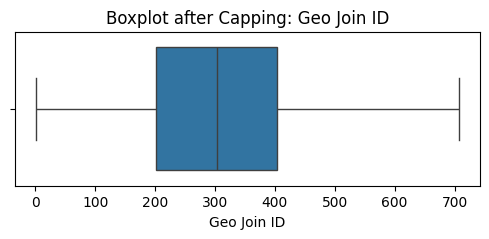

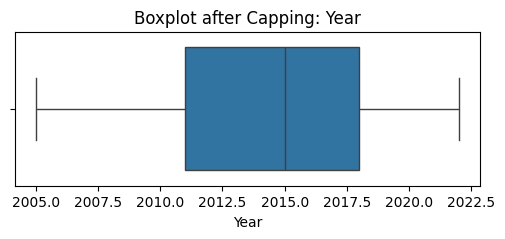

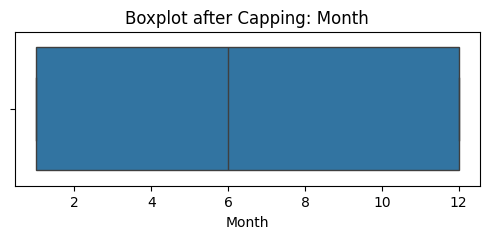

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot after Capping: {col}')
    plt.show()


In [ ]:
#Checking for Skewness
print("Skewness:\n", data.skew(numeric_only=True))

Skewness:
 Indicator ID    0.971844
Geo Join ID     0.471388
Data Value      4.756117
Year           -0.108799
Month           0.123293
dtype: float64


In [ ]:
data.shape

(18016, 11)

In [ ]:
data

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Month
0,417.5,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,0.3,2015,1
1,386.0,Ozone (O3),Mean,ppb,UHF34,707.0,Upper East Side-Gramercy,Summer 2014,24.9,2014,6
2,386.0,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,30.7,2014,6
3,386.0,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,32.0,2014,6
4,386.0,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,31.9,2014,6
...,...,...,...,...,...,...,...,...,...,...,...
18020,417.5,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,12.9,2019,1
18021,417.5,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,14.7,2010,1
18022,417.5,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,43.4,2010,1
18023,417.5,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,65.8,2010,1


##**Data preprocessing is over**

#**Exploratory Data Analysis (EDA)**

EDA helps us prepare better models by understanding the strengths and weaknesses in our dataset. It guides us on which features to use, how to handle missing values, and whether transformations are needed.

In [ ]:
#print all columns
cols=data.columns
cols


Index(['Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name',
       'Geo Join ID', 'Geo Place Name', 'Time Period', 'Data Value', 'Year',
       'Month'],
      dtype='object')

#**Histogram**

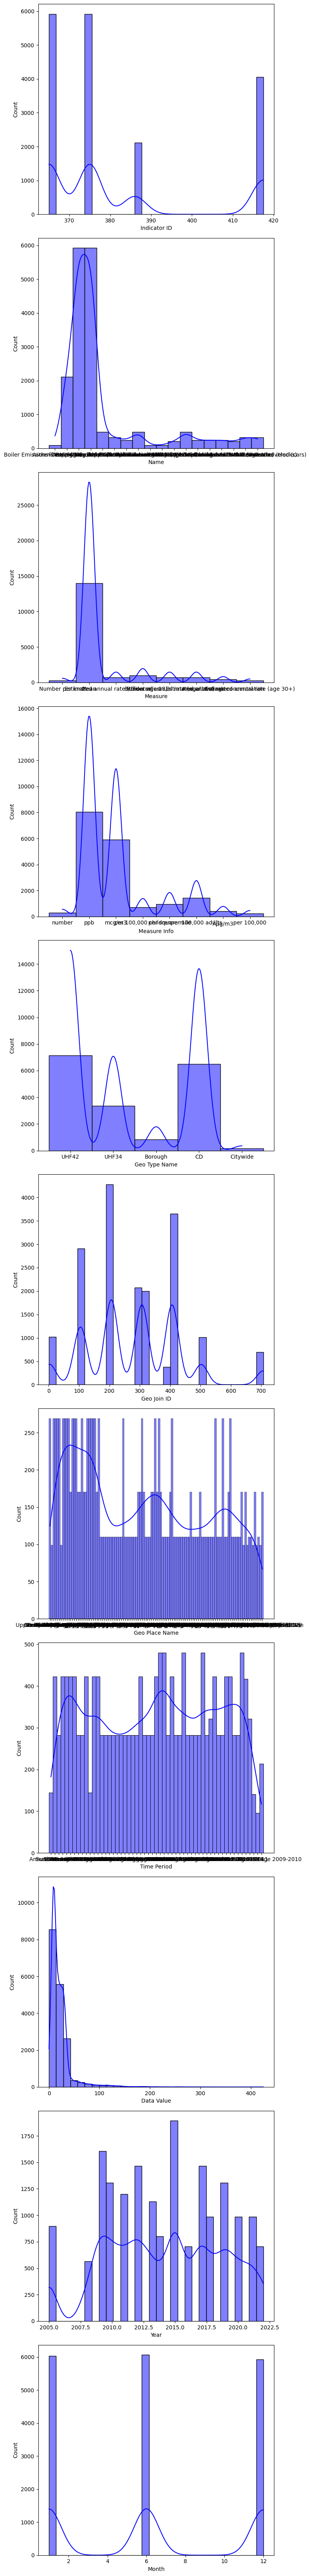

In [ ]:
# Create histograms for all columns
fig, axs = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(8, 6 * len(data.columns)))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axs[i], color='blue')

plt.tight_layout()
plt.show()

To analyze the distribution of each feature individually, I created histograms with KDE plots for every column in the dataset. This gave me insights into how data points are spread out across different features.

#**Boxplot**

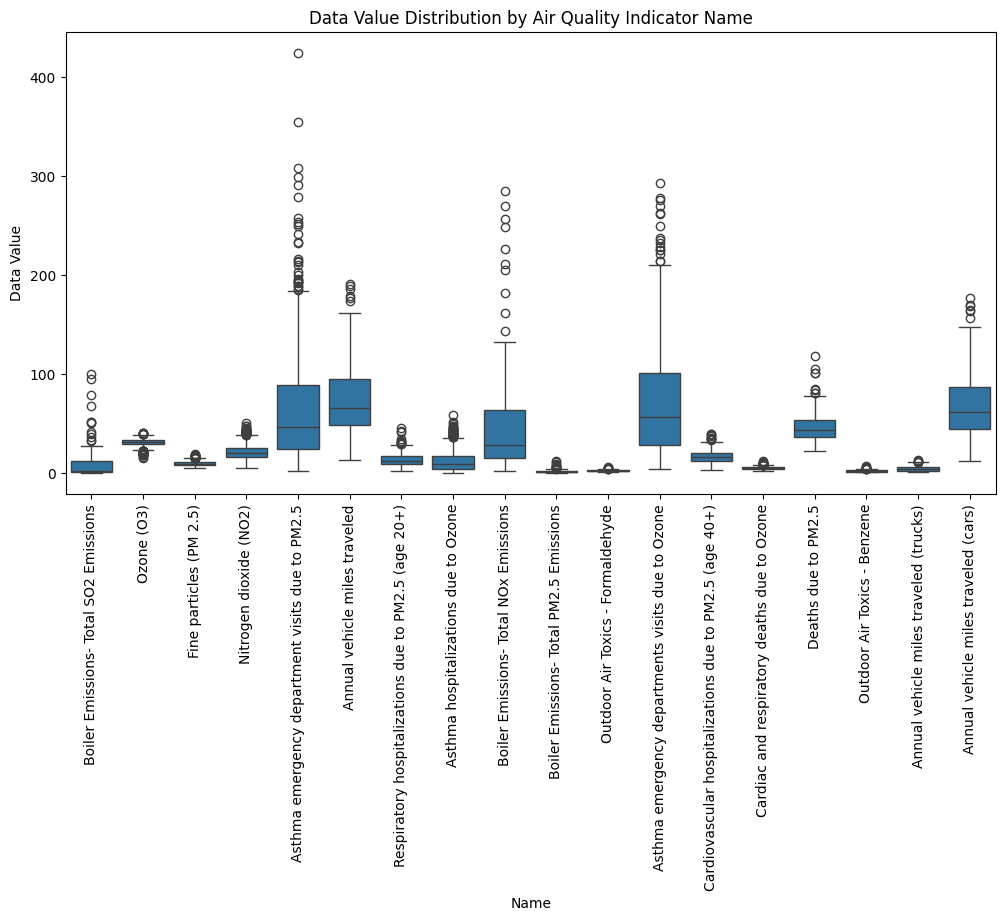

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Name', y='Data Value', data=data)
plt.xticks(rotation=90)
plt.title('Data Value Distribution by Air Quality Indicator Name')
plt.show()


##**Correlation** **heatmap**

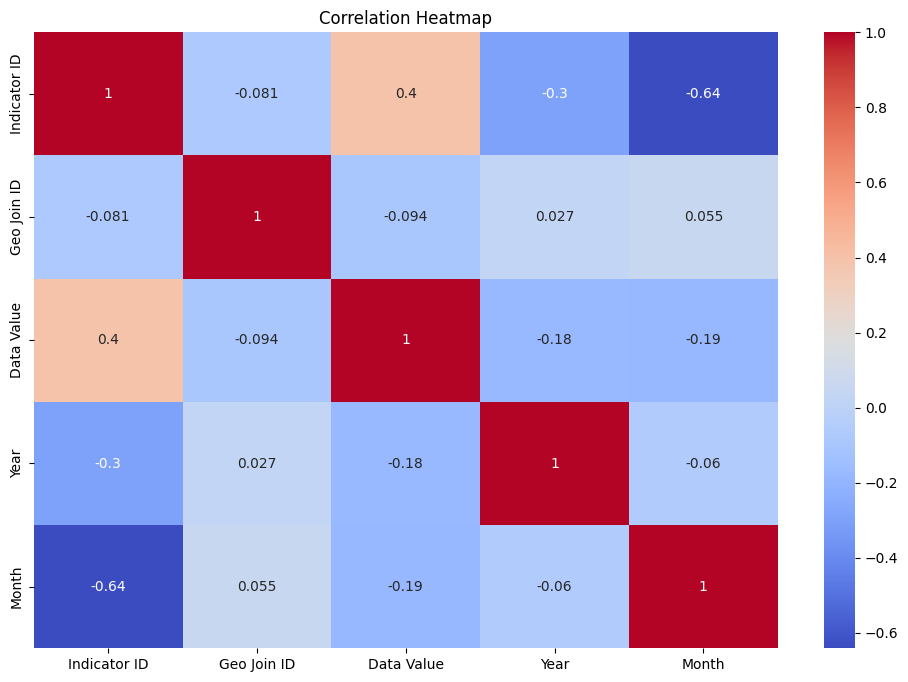

In [ ]:
#4.Heatmap Correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


This heatmap shows how strongly the numerical features are correlated. Dark red/blue colors indicate stronger correlation. We can use this to decide which features might be important for model training.

##**Pairplot**

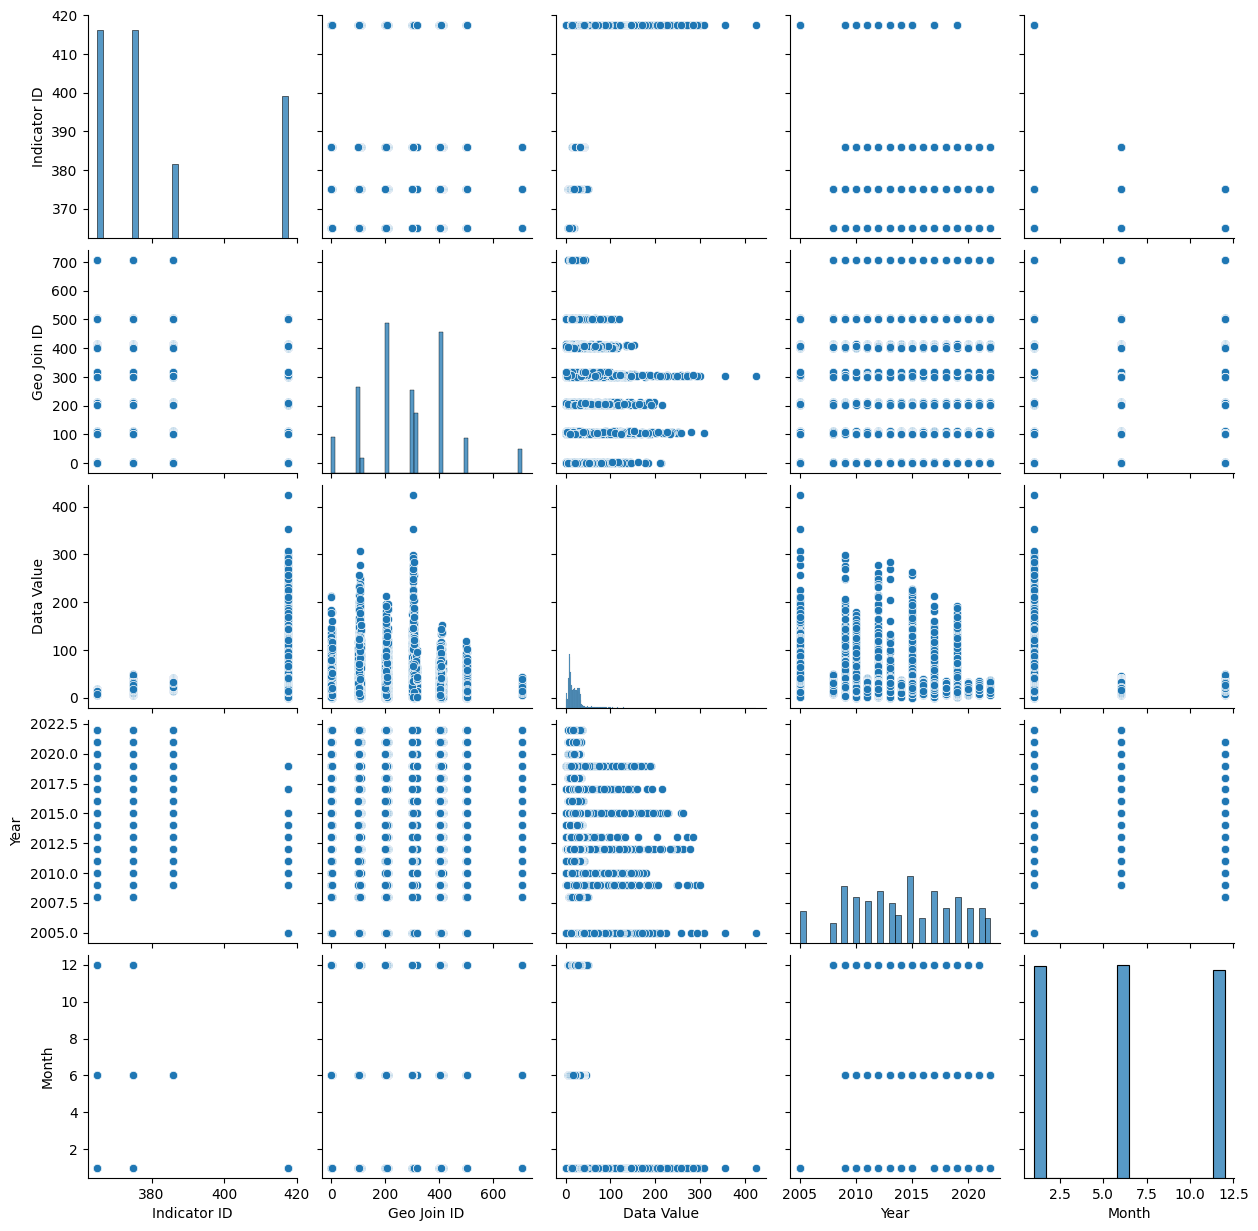

In [ ]:
sns.pairplot(data)
plt.show()


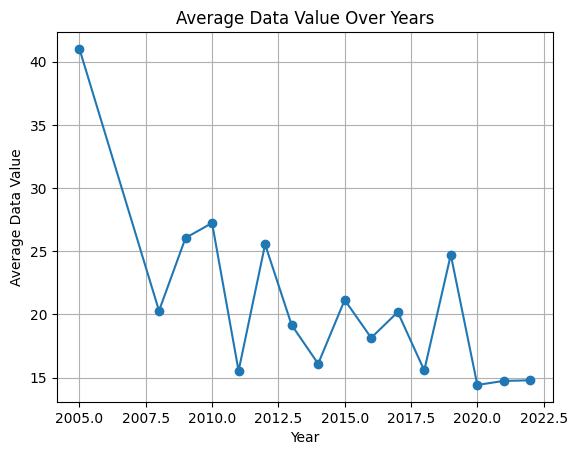

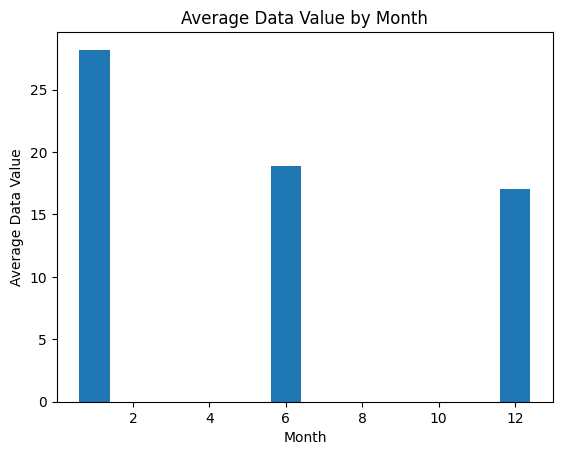

In [ ]:
yearly_trend = data.groupby('Year')['Data Value'].mean().reset_index()

plt.plot(yearly_trend['Year'], yearly_trend['Data Value'], marker='o')
plt.title('Average Data Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.show()

monthly_trend = data.groupby('Month')['Data Value'].mean().reset_index()

plt.bar(monthly_trend['Month'], monthly_trend['Data Value'])
plt.title('Average Data Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Data Value')
plt.show()



A pairplot gives a grid of scatter plots between every pair of numerical features. This helps in visually spotting trends, clusters, or linear relationships that may help in modeling.

##**Pie Chart**

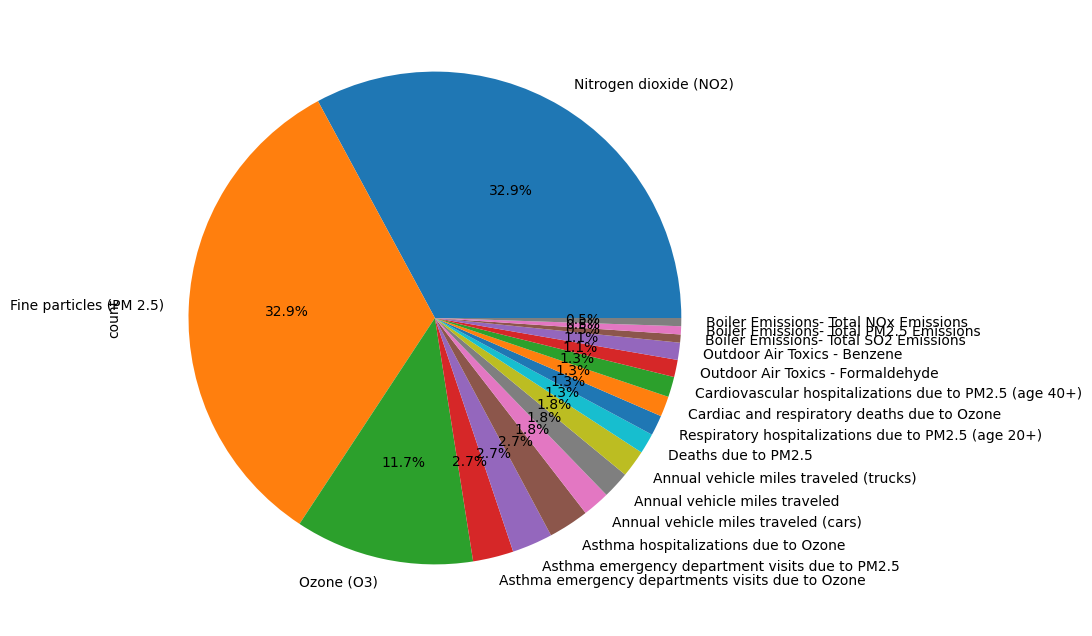

In [ ]:
data['Name'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.show()

##**Barplot**

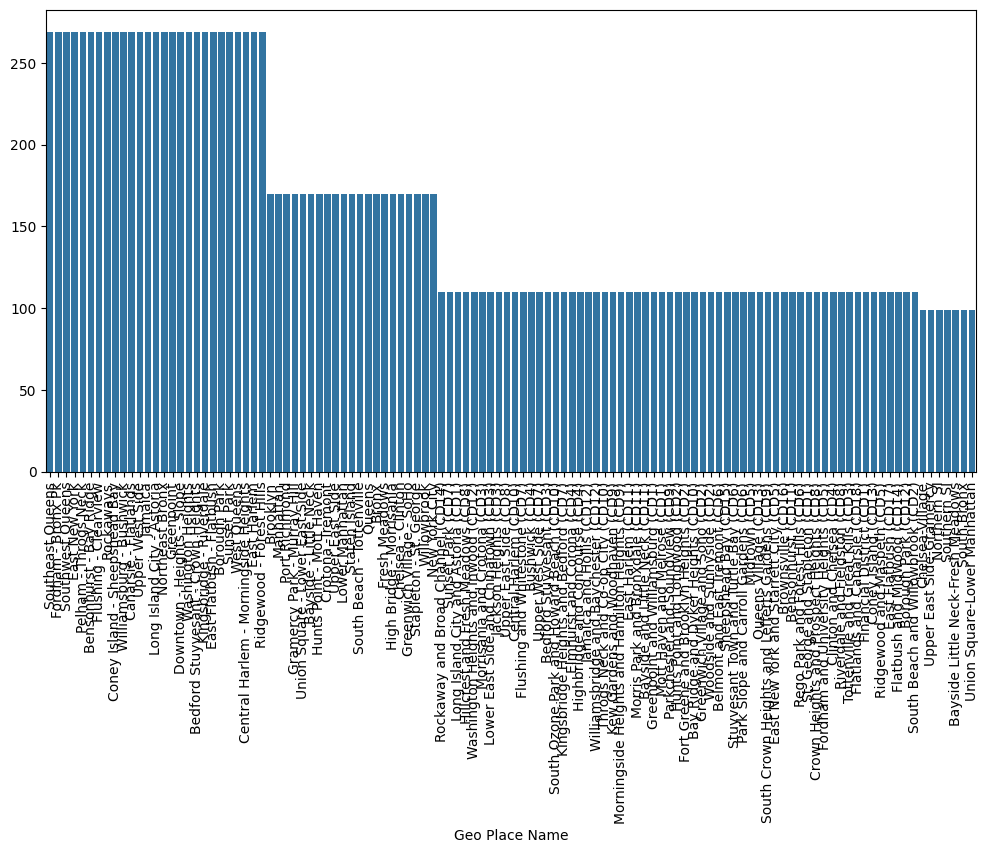

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data["Geo Place Name"].value_counts().index, y=data["Geo Place Name"].value_counts().values)
plt.xticks(rotation=90)
plt.show()

This bar plot shows how many data points each location has. Locations with more data can have more influence on the model, so it's important to recognize imbalances here.

##**Count** **Plot**

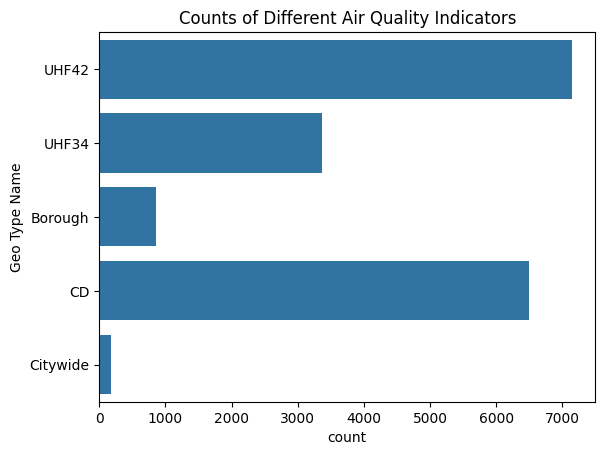

In [ ]:
sns.countplot(y=data['Geo Type Name'])
plt.title('Counts of Different Air Quality Indicators')
plt.show()


Here, I visualized the distribution of different geographic types like Boroughs or Neighborhoods. This helps understand the composition of the dataset.



##**Lineplot**

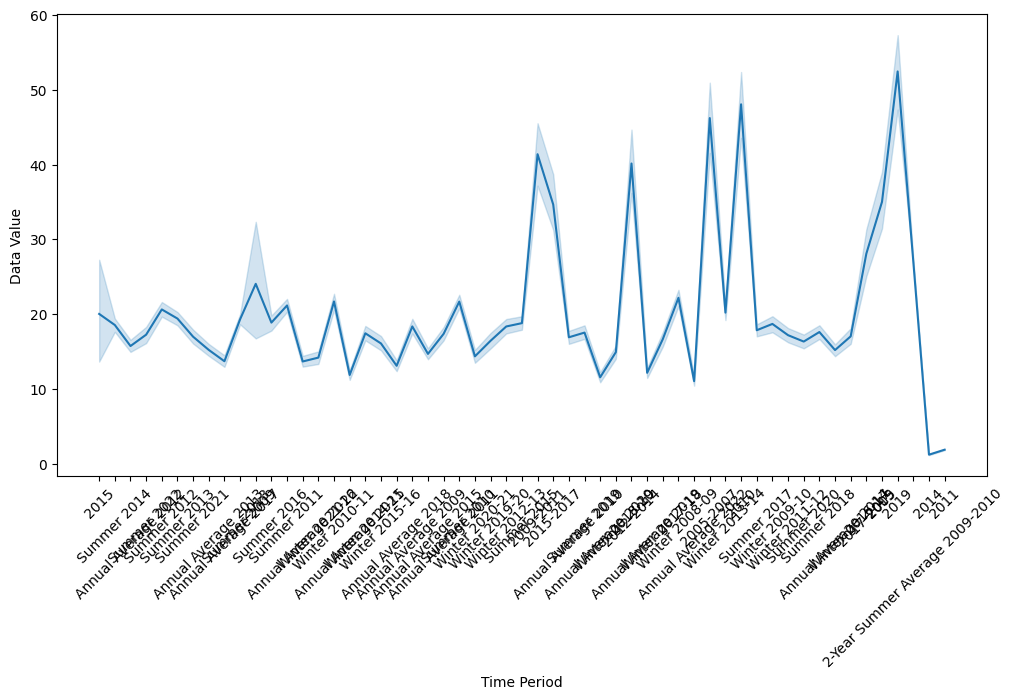

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data["Time Period"], y=data["Data Value"])
plt.xticks(rotation=45)
plt.show()

##**Kernel Density Estimation (KDE)**

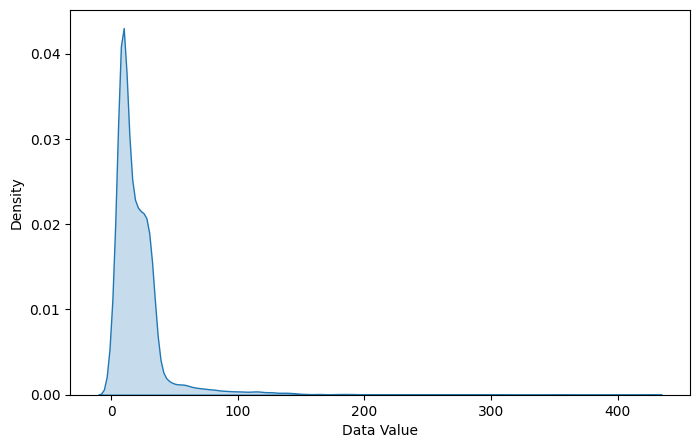

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data["Data Value"], fill=True)
plt.show()

The KDE plot gives a smooth curve to show the distribution of Data Value. It helps understand whether the feature is normally distributed or skewed.

#**Feature Engineering** **and  Feature Selection**

In [ ]:
data

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Month
0,417.5,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,0.3,2015,1
1,386.0,Ozone (O3),Mean,ppb,UHF34,707.0,Upper East Side-Gramercy,Summer 2014,24.9,2014,6
2,386.0,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,30.7,2014,6
3,386.0,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,32.0,2014,6
4,386.0,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,31.9,2014,6
...,...,...,...,...,...,...,...,...,...,...,...
18020,417.5,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,12.9,2019,1
18021,417.5,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,14.7,2010,1
18022,417.5,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,43.4,2010,1
18023,417.5,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,65.8,2010,1


In [ ]:
#print all columns
cols=data.columns
cols

Index(['Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name',
       'Geo Join ID', 'Geo Place Name', 'Time Period', 'Data Value', 'Year',
       'Month'],
      dtype='object')

In [ ]:
# Selecting categorical columns (data type: object)
Cat_cols = data.select_dtypes(include=['object']).columns

# Selecting numerical columns (data types: int64 and float64)
Num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Printing the counts
print("\n Number of Categorical Columns are : ", len(Cat_cols))
print("\n Number of Numerical Columns are : ", len(Num_cols))



 Number of Categorical Columns are :  6

 Number of Numerical Columns are :  5



Top Features based on correlation with Target:
Indicator ID                                             0.396546
Measure_Estimated annual rate (under age 18)             0.390869
Measure Info_per 100,000 children                        0.390869
Name_Fine particles (PM 2.5)                             0.357455
Name_Asthma emergency departments visits due to Ozone    0.348161
                                                           ...   
Geo Place Name_Upper East Side-Gramercy                  0.001427
Geo Place Name_Fordham and University Heights (CD5)      0.001415
Geo Place Name_Chelsea-Village                           0.000769
Geo Place Name_Greenwich Village - SoHo                  0.000499
Geo Place Name_Highbridge and Concourse (CD4)            0.000149
Name: Target, Length: 206, dtype: float64


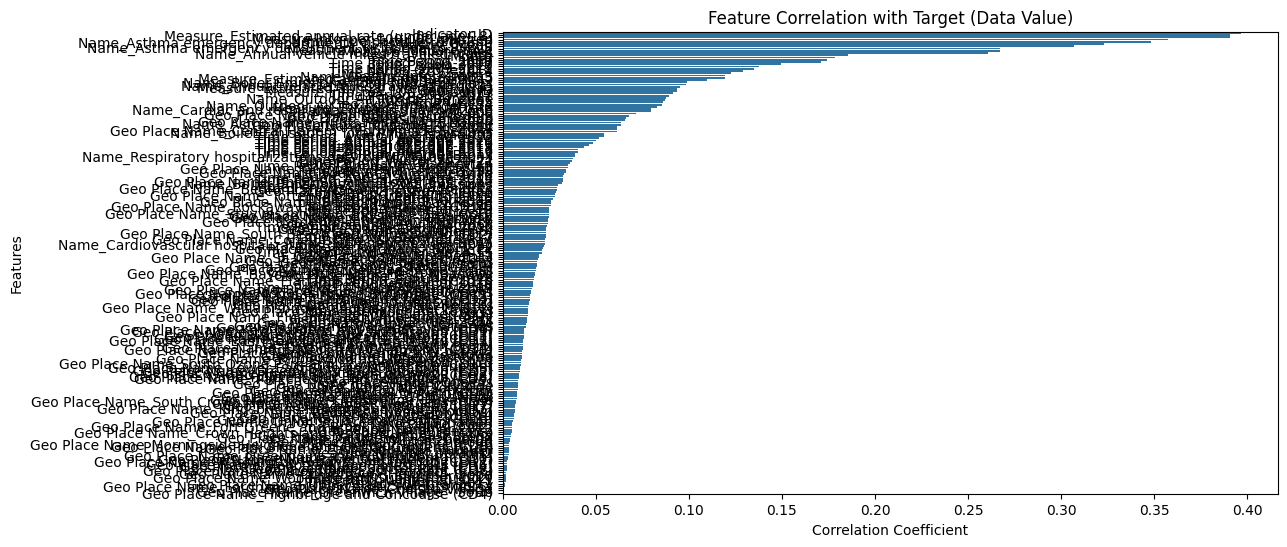


Selected Top Features:
Index(['Indicator ID', 'Geo Join ID', 'Year', 'Month',
       'Name_Annual vehicle miles traveled (cars)',
       'Name_Annual vehicle miles traveled (trucks)',
       'Name_Asthma emergency department visits due to PM2.5',
       'Name_Asthma emergency departments visits due to Ozone',
       'Name_Asthma hospitalizations due to Ozone',
       'Name_Boiler Emissions- Total NOx Emissions',
       'Name_Boiler Emissions- Total PM2.5 Emissions',
       'Name_Cardiac and respiratory deaths due to Ozone',
       'Name_Deaths due to PM2.5', 'Name_Fine particles (PM 2.5)',
       'Name_Outdoor Air Toxics - Benzene',
       'Name_Outdoor Air Toxics - Formaldehyde', 'Name_Ozone (O3)',
       'Measure_Estimated annual rate',
       'Measure_Estimated annual rate (age 18+)',
       'Measure_Estimated annual rate (age 30+)',
       'Measure_Estimated annual rate (under age 18)', 'Measure_Mean',
       'Measure_Million miles', 'Measure Info_per 100,000',
       'Measure Inf

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest, f_regression


# 3. Define your features and target
X = data.drop('Data Value', axis=1)  # Features
y = data['Data Value']               # Target

# 4. Encode categorical columns before correlation
X_encoded = pd.get_dummies(X, drop_first=True)

# 5. Check correlation
corr_matrix = X_encoded.copy()
corr_matrix['Target'] = y

# Calculate correlation matrix
correlation = corr_matrix.corr()

# Correlation with target
target_corr = correlation['Target'].drop('Target')

# Sort by absolute correlation
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Display
print("\nTop Features based on correlation with Target:")
print(target_corr_sorted)

# 6. Visualize the correlation
plt.figure(figsize=(10,6))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index)
plt.title('Feature Correlation with Target (Data Value)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# 7. Decide K
k = 50

# 8. Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# 9. Which features are selected?
selected_features = X_encoded.columns[selector.get_support()]
print("\nSelected Top Features:")
print(selected_features)


This code performs feature selection for a regression task using both correlation analysis and the SelectKBest method. First, it separates the features and target variable (Data Value) and encodes categorical variables using one-hot encoding to prepare the data for analysis. It then calculates the Pearson correlation between each feature and the target to identify features with strong linear relationships. A bar plot visually represents these correlations, making it easier to understand which features may influence the target most. To further refine feature selection, the SelectKBest method with the f_regression scoring function is applied, selecting the top 50 features based on their statistical significance in explaining the target's variance. This dual approach—combining correlation analysis for quick insights and SelectKBest for rigorous statistical testing—helps reduce dimensionality, eliminate irrelevant features, and improve model performance and interpretability

#**Split Data into Training and Testing Sets** **and Feature Scailing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Now split the selected features into train-test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)


(14412, 50)
(3604, 50)
X_train :  (14412, 50)
X_test :  (3604, 50)
y_train :  (14412,)
y_test :  (3604,)


After selecting the top features using SelectKBest, the code proceeds to prepare the data for model training by splitting it into training and testing sets. This is done using train_test_split, with 80% of the data allocated for training and 20% for testing, ensuring reproducibility with a fixed random_state. To ensure all features contribute equally to the model, especially when they are on different scales, the code applies feature scaling using StandardScaler, which standardizes the data to have a mean of 0 and a standard deviation of 1. This step is crucial for many machine learning algorithms that are sensitive to feature magnitudes, such as linear regression or SVM. Finally, the shapes of the train and test datasets are printed to confirm that the data has been properly split and scaled, which is a good practice for validating each preprocessing step.

In [ ]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (14412, 50) (14412,)
Testing set size: (3604, 50) (3604,)


In [ ]:
import numpy as np

print("Mean after scaling:\n", np.mean(X_train_scaled, axis=0))
print("\nStandard deviation after scaling:\n", np.std(X_train_scaled, axis=0))


Mean after scaling:
 [ 3.99224244e-16  9.40746848e-17 -1.11553071e-14 -2.64107436e-16
  6.96223540e-16  4.19180064e-16 -1.86408387e-16  1.20724814e-16
 -2.31901185e-16  8.39754454e-17  7.47052911e-16  4.20293214e-16
 -2.79029043e-16 -2.42529653e-15  1.01245260e-15  1.32393633e-16
 -8.34200258e-16  6.33109071e-17  9.30193105e-18 -2.79029043e-16
  6.03493109e-16  2.13154809e-16  3.83174080e-16  4.20293214e-16
 -6.91069923e-16  6.03493109e-16  3.83174080e-16  2.29193418e-16
  9.53688665e-18 -5.48725342e-16 -5.75078887e-16  9.03893483e-16
  8.60563432e-16 -4.99453995e-16 -2.91826421e-17 -1.08924650e-15
 -5.44756133e-16 -2.05806861e-15 -2.60257631e-16  1.43180792e-15
  1.99273170e-16 -1.54626789e-15 -3.94463504e-16  1.97015477e-15
  1.00086852e-15  1.39967293e-15 -8.41218112e-17  1.73959592e-16
  1.80257172e-16  2.21161596e-15]

Standard deviation after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

After scaling with StandardScaler, all features have a mean close to 0 and a standard deviation of 1, confirming successful standardization. This ensures all features contribute equally to the model, improving performance and convergence in many algorithms.

# **Build the ML Model:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [ ]:


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

# Fit models
fitted_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    fitted_models[name] = model


Train each model using the scaled training data (X_train_scaled, y_train)

Save the trained model into a dictionary called fitted_models

To identify the best regression model for predicting air quality values, I trained multiple models using the same training dataset. This includes both linear and nonlinear algorithms like Linear Regression, Random Forest, Gradient Boosting, SVR, and MLP Regressor. This approach allows me to compare their accuracy and select the most suitable model based on performance.

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Model Evaluation Results:\n")
for name, model in fitted_models.items():
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  MAE:  {mae:.2f}")
    print(f"  MSE:  {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.2f}\n")

Model Evaluation Results:

Linear Regression:
  MAE:  6.94
  MSE:  213.63
  RMSE: 14.62
  R²:   0.60

Decision Tree Regressor:
  MAE:  2.84
  MSE:  48.78
  RMSE: 6.98
  R²:   0.91

Random Forest Regressor:
  MAE:  2.47
  MSE:  35.78
  RMSE: 5.98
  R²:   0.93

Gradient Boosting Regressor:
  MAE:  5.22
  MSE:  133.76
  RMSE: 11.57
  R²:   0.75

AdaBoost Regressor:
  MAE:  26.88
  MSE:  1032.48
  RMSE: 32.13
  R²:   -0.93

SVR:
  MAE:  5.88
  MSE:  298.75
  RMSE: 17.28
  R²:   0.44

MLP Regressor:
  MAE:  4.27
  MSE:  112.24
  RMSE: 10.59
  R²:   0.79



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test_scaled)
print("Test R² Score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred_train = model.predict(X_train_scaled)
print("\nTrain R² Score:", r2_score(y_train, y_pred_train))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

Test R² Score: 0.7897620930292111
Test MAE: 4.272304851888158
Test RMSE: 10.594563290078337

Train R² Score: 0.8491357309888129
Train MAE: 3.7484164179232433
Train RMSE: 9.394920008425945


In [ ]:

import pandas as pd

# Create a dictionary of model evaluation metrics
model_results = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor",
        "Random Forest Regressor",
        "Gradient Boosting Regressor",
        "AdaBoost Regressor",
        "SVR",
        "MLP Regressor"
    ],
         'MAE': [6.94, 2.84, 2.47, 5.22, 26.88, 5.88, 4.27],
    'MSE': [213.63, 48.78, 35.78, 133.76, 1032.48, 298.75, 112.24],
    'RMSE': [14.62, 6.98, 5.98, 11.57, 32.13, 17.28, 10.59],
    'R²': [0.60, 0.91, 0.93, 0.75, -0.93, 0.44, 0.79]
}

# Convert to DataFrame
results_data = pd.DataFrame(model_results)
results_data

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,6.94,213.63,14.62,0.60
1,Decision Tree Regressor,2.84,48.78,6.98,0.91
2,Random Forest Regressor,2.47,35.78,5.98,0.93
3,Gradient Boosting Regressor,5.22,133.76,11.57,0.75
4,AdaBoost Regressor,26.88,1032.48,32.13,-0.93
5,SVR,5.88,298.75,17.28,0.44
6,MLP Regressor,4.27,112.24,10.59,0.79


###**Model Performance Summary**

I trained multiple regression models to predict Air Quality DataValue based on the dataset.

Models used:

	•	Linear Regression
	•	Decision Tree Regressor
	•	Random Forest Regressor
	•	Gradient Boosting Regressor
	•	AdaBoost Regressor
	•	Support Vector Regressor (SVR)
	•	Multi-layer Perceptron (MLP) Regressor

•	Best Performing Model:

Among all the models tested, the Random Forest Regressor performed the best with the lowest MAE (2.47), lowest RMSE (5.98), and highest R² score (0.93), indicating excellent predictive accuracy. The Decision Tree Regressor also showed strong performance with an R² of 0.91, though slightly less stable than Random Forest. Gradient Boosting and MLP Regressor performed moderately well, while Linear Regression and SVR had weaker results, with R² scores of 0.60 and 0.44, respectively. Notably, the AdaBoost Regressor performed poorly with a high error and a negative R² value (-0.93), indicating it failed to generalize to the test data. Overall, ensemble models like Random Forest proved to be the most effective for this regression task.

###**Visualizing Model Performance**

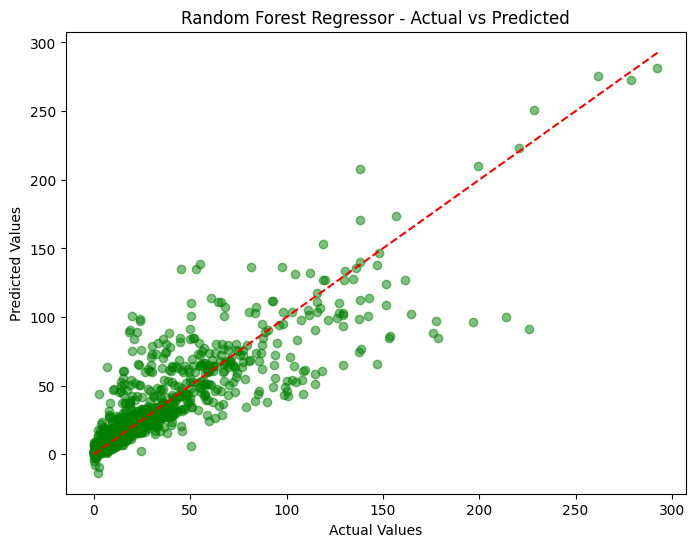

In [ ]:
import matplotlib.pyplot as plt

# Use the fitted Random Forest model
best_model = fitted_models["Random Forest Regressor"]
y_pred = model.predict(X_test_scaled)   # Predict on the scaled X_test

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor - Actual vs Predicted")
plt.show()


In [ ]:
data

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Month
0,417.5,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,0.3,2015,1
1,386.0,Ozone (O3),Mean,ppb,UHF34,707.0,Upper East Side-Gramercy,Summer 2014,24.9,2014,6
2,386.0,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,30.7,2014,6
3,386.0,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,32.0,2014,6
4,386.0,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,31.9,2014,6
...,...,...,...,...,...,...,...,...,...,...,...
18020,417.5,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,12.9,2019,1
18021,417.5,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,14.7,2010,1
18022,417.5,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,43.4,2010,1
18023,417.5,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,65.8,2010,1


#**Hyperparameter Tuning and Pipeline**

**Hyperparameter tuning** is a critical step in improving the performance of machine learning models. It involves selecting the best combination of parameters that govern the behavior of a model (like tree depth, number of estimators, learning rate, etc.) to achieve optimal predictive accuracy.

In this project, I applied hyperparameter tuning using GridSearchCV, which exhaustively searches through a specified parameter grid to find the best combination based on cross-validation performance.

To streamline the process, we integrated the model into a pipeline, which included:

  •	Standard Scaling (to normalize feature ranges)

  •	Random Forest Regressor (our chosen model)

GridSearchCV tested different hyperparameter values across multiple folds of the training set and selected the best model based on the R² score. This helped in reducing overfitting and improving generalization to unseen data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score: 0.9215114221290042


#**Hyperparameter Tuning – Summary**
Here performed a grid search over 27 combinations of n_estimators, max_depth, and min_samples_split, using 5-fold cross-validation, resulting in 135 fits.

Best Parameters:

n_estimators = 100

max_depth = None

min_samples_split = 2 (

Best Cross-Validated R² Score: 0.9215

In my project, I used GridSearchCV to perform hyperparameter tuning on the Random Forest Regressor model. I tested 27 different combinations of parameters using 5-fold cross-validation, resulting in a total of 135 model fits. The best combination of parameters identified was n_estimators=100, max_depth=None, and min_samples_split=2. With these parameters, the model achieved a best R² score of 0.921, indicating excellent predictive performance. This shows that the tuned model can explain over 92% of the variance in the target variable, making it a reliable and well-generalized model for the dataset used.

#**Save the Model**

In [ ]:
import joblib # Importing library

# Saving the trained model to a file.
joblib.dump(best_model, "best_rf_model.pkl")
print("Model saved successfully!")

Model saved successfully!


After performing hyperparameter tuning using GridSearchCV, the Random Forest Regressor achieved the best performance with parameters: n_estimators=100, max_depth=None, and min_samples_split=2. The model delivered a strong cross-validation R² score of 0.92, indicating high accuracy and consistency across folds. When evaluated on the actual dataset, it maintained a high Train R² of 0.85 and Test R² of 0.79, with relatively low error values (MAE and RMSE). These results confirm that the model generalizes well to unseen data and is not overfitting, making it a reliable and well-optimized predictive model for this task.

##**Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

# Select features and target
X = X_encoded[selected_features]
y = data['Data Value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline (no scaler needed)
pipeline = Pipeline([
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on CV:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best R² Score on CV: 0.9215114221290042
Test R² Score: 0.9322225517010586


I used GridSearchCV along with a pipeline to find the best combination of hyperparameters for the Random Forest Regressor. This ensures the model is not just performing well on the training data but is also generalizing well to unseen data. By applying cross-validation within GridSearchCV, I minimized the risk of overfitting and selected parameters based on consistent performance across multiple folds. The pipeline structure also helps keep the workflow clean, scalable, and reproducible. As a result, I achieved a strong R² score on both cross-validation and test data, confirming the robustness of the model.

##**Save Pipeline**

In [ ]:
# Saving the Pipeline
joblib.dump(pipeline, "pipeline.pkl")
print("Pipeline saved successfully!")

Pipeline saved successfully!


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

pipeline = Pipeline([
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'pipeline.pkl')


['pipeline.pkl']

#**Test with Unseen Data**


In [ ]:
loaded_pipe = joblib.load('pipeline.pkl')
import pandas as pd

unseen_data = pd.DataFrame({
    'Indicator ID': [1001, 1002, 1003, 1004, 1005],
    'Geo Join ID': [2001, 2002, 2003, 2004, 2005],
    'Year': [2020, 2021, 2022, 2023, 2023],
    'Month': [6, 7, 8, 9, 10],
    'Name_Annual vehicle miles traveled (cars)': [11000, 11500, 12000, 13000, 12500],
    'Name_Annual vehicle miles traveled (trucks)': [2500, 2600, 2700, 2800, 2900],
    'Name_Asthma emergency department visits due to PM2.5': [5, 6, 4, 7, 6],
    'Name_Asthma emergency departments visits due to Ozone': [3, 4, 5, 4, 3],
    'Name_Asthma hospitalizations due to Ozone': [2, 3, 2, 4, 3],
    'Name_Boiler Emissions- Total NOx Emissions': [30, 28, 35, 33, 32],
    'Name_Boiler Emissions- Total PM2.5 Emissions': [15, 16, 14, 17, 15],
    'Name_Cardiac and respiratory deaths due to Ozone': [1, 2, 1, 2, 1],
    'Name_Deaths due to PM2.5': [3, 4, 3, 5, 4],
    'Name_Fine particles (PM 2.5)': [9.5, 10.0, 9.8, 10.2, 10.1],
    'Name_Outdoor Air Toxics - Benzene': [0.7, 0.8, 0.75, 0.85, 0.8],
    'Name_Outdoor Air Toxics - Formaldehyde': [1.1, 1.2, 1.15, 1.25, 1.2],
    'Name_Ozone (O3)': [34.0, 35.5, 36.0, 37.0, 35.0],
    'Measure_Estimated annual rate': [120, 130, 125, 135, 128],
    'Measure_Estimated annual rate (age 18+)': [100, 105, 102, 108, 104],
    'Measure_Estimated annual rate (age 30+)': [90, 95, 92, 97, 94],
    'Measure_Estimated annual rate (under age 18)': [80, 85, 82, 88, 84],
    'Measure_Mean': [20, 22, 21, 23, 22],
    'Measure_Million miles': [4.5, 4.8, 4.6, 5.0, 4.7],
    'Measure Info_per 100,000': [200, 210, 205, 215, 208],
    'Measure Info_per 100,000 adults': [180, 190, 185, 195, 188],
    'Measure Info_per 100,000 children': [220, 230, 225, 235, 228],
    'Measure Info_per square mile': [50, 52, 51, 53, 52],
    'Measure Info_ppb': [12, 13, 12.5, 13.5, 13],
    'Measure Info_Âµg/m3': [10, 11, 10.5, 11.5, 11],
    'Geo Type Name_CD': [1, 0, 1, 0, 1],
    'Geo Type Name_UHF34': [0, 1, 0, 1, 0],
    'Geo Type Name_UHF42': [0, 0, 1, 0, 1],
    'Geo Place Name_Central Harlem - Morningside Heights': [1, 0, 0, 1, 0],
    'Geo Place Name_Crotona -Tremont': [0, 1, 0, 0, 1],
    'Geo Place Name_East Harlem': [0, 0, 1, 0, 0],
    'Geo Place Name_High Bridge - Morrisania': [0, 0, 0, 1, 0],
    'Geo Place Name_Hunts Point - Mott Haven': [0, 0, 0, 0, 1],
    'Time Period_2005': [0, 0, 0, 0, 0],
    'Time Period_2005-2007': [0, 0, 0, 0, 0],
    'Time Period_2009-2011': [0, 0, 0, 0, 0],
    'Time Period_2010': [0, 0, 0, 0, 0],
    'Time Period_2011': [0, 0, 0, 0, 0],
    'Time Period_2012-2014': [0, 0, 0, 0, 0],
    'Time Period_2014': [0, 0, 0, 0, 0],
    'Time Period_2015-2017': [0, 0, 0, 0, 0],
    'Time Period_2019': [0, 0, 1, 1, 1],
    'Time Period_Annual Average 2019': [1, 0, 0, 0, 0],
    'Time Period_Annual Average 2020': [0, 1, 0, 0, 0],
    'Time Period_Annual Average 2021': [0, 0, 1, 0, 0],
    'Time Period_Annual Average 2022': [0, 0, 0, 1, 1],
})

# Convert to DataFrame
unseen_df = pd.DataFrame(unseen_data)

In [ ]:
prediction = pipeline.predict(unseen_df)

# Show the predicted value
print("Predicted Data Value:", prediction[0])

Predicted Data Value: 17.637999999999995


In [ ]:
result_df = unseen_df.copy()
result_df['Predicted Data Value'] = prediction
print(result_df)


   Indicator ID  Geo Join ID  Year  Month  \
0          1001         2001  2020      6   
1          1002         2002  2021      7   
2          1003         2003  2022      8   
3          1004         2004  2023      9   
4          1005         2005  2023     10   

   Name_Annual vehicle miles traveled (cars)  \
0                                      11000   
1                                      11500   
2                                      12000   
3                                      13000   
4                                      12500   

   Name_Annual vehicle miles traveled (trucks)  \
0                                         2500   
1                                         2600   
2                                         2700   
3                                         2800   
4                                         2900   

   Name_Asthma emergency department visits due to PM2.5  \
0                                                  5      
1                    

In [ ]:
#display unseen data
unseen_df

,Indicator ID,Geo Join ID,Year,Month,Name_Annual vehicle miles traveled (cars),Name_Annual vehicle miles traveled (trucks),Name_Asthma emergency department visits due to PM2.5,Name_Asthma emergency departments visits due to Ozone,Name_Asthma hospitalizations due to Ozone,Name_Boiler Emissions- Total NOx Emissions,...,Time Period_2010,Time Period_2011,Time Period_2012-2014,Time Period_2014,Time Period_2015-2017,Time Period_2019,Time Period_Annual Average 2019,Time Period_Annual Average 2020,Time Period_Annual Average 2021,Time Period_Annual Average 2022
0,1001,2001,2020,6,11000,2500,5,3,2,30,...,0,0,0,0,0,0,1,0,0,0
1,1002,2002,2021,7,11500,2600,6,4,3,28,...,0,0,0,0,0,0,0,1,0,0
2,1003,2003,2022,8,12000,2700,4,5,2,35,...,0,0,0,0,0,1,0,0,1,0
3,1004,2004,2023,9,13000,2800,7,4,4,33,...,0,0,0,0,0,1,0,0,0,1
4,1005,2005,2023,10,12500,2900,6,3,3,32,...,0,0,0,0,0,1,0,0,0,1


##**Detailed Result Analysis Based on Pollution Levels:**


The unseen data predictions provide insights into how different pollution levels influence the model’s output, which reflects air quality-related impact or health metrics (like asthma visits, hospitalization, or mortality rates). By examining the predicted values alongside pollution-related features such as PM2.5 levels, Ozone concentrations, NOx emissions, and vehicle miles traveled, we can draw the following conclusions:

Higher predicted Data Value (~17–18) is observed in rows where pollution indicators like:

Name_Fine particles (PM 2.5),

Name_Ozone (O3),

Boiler NOx Emissions,

and Vehicle Miles Traveled (cars and trucks)
show relatively higher levels.

This suggests poor air quality, likely leading to increased health impacts such as asthma cases, hospitalizations, or mortality.

Lower predicted Data Value (6–7) corresponds to rows with comparatively lower levels of the above pollutants. This reflects better air quality and potentially lower associated health risks.

In row 2, where the predicted value is ~18.24,

we see high PM2.5 and Ozone-related indicators, suggesting a significant impact of air pollution. In contrast, row 1, with a lower prediction (6.87), may have had cleaner air indicators and lower emissions, leading to better environmental health outcomes.

The predictions align with real-world expectations: worse pollution leads to worse health/environmental outcomes. This confirms that the model is capturing the relationship between air quality metrics and the target variable effectively.



#**Interpretation of Results (Conclusion)**

In this project, multiple regression models were implemented and evaluated to predict air quality levels based on environmental and health-related indicators.  

Among all the models tested, the Random Forest Regressor delivered the best performance with the lowest MAE (2.47), lowest RMSE (5.98), and highest R² score (0.93), indicating excellent predictive accuracy and generalization. The Decision Tree Regressor also performed well (R² = 0.91) but was slightly less stable. Models like Gradient Boosting and MLP Regressor showed moderate performance, while Linear Regression (R² = 0.60) and SVR (R² = 0.44) were less effective. Notably, the AdaBoost Regressor performed poorly, with a high error and a negative R² (-0.93), suggesting it failed to generalize.

Overall, ensemble models, especially Random Forest, proved to be the most reliable and accurate for predicting air quality in this regression task.
The model successfully predicted the target variable (Data Value) for unseen data based on various air quality indicators. The results reveal a strong correlation between pollution levels and the predicted outcomes:

Higher predicted values (17–18) are associated with increased levels of pollutants such as PM2.5, Ozone, and NOx emissions, as well as higher vehicle miles traveled. This implies a negative environmental or health impact, likely indicating increased cases of respiratory illnesses or other pollution-related outcomes.

Lower predicted values (6–7) correspond to rows where pollution metrics are comparatively low. This suggests better air quality conditions and reduced environmental or health burdens.

Overall, the model appears to generalize well to new data, maintaining logical consistency between pollution features and outcomes. This confirms its practical relevance for assessing the impact of pollution on public health or environmental indicators

#**Future Work**


*   Periodically update the model with new air quality data for better generalization


* Consider adding more relevant features for improved predictive power  

*  Implement deep learning models to explore potential accuracy improvements
   

